Convolution Neural Network

이번 예제는 Keras 라이브러리에서 제공하는 예제입니다. 손글씨를 인식하는 예제이다.

우선 학습 모델을 만들기 전에 데이터를 전처리하는 과정을 거쳐야 한다.

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


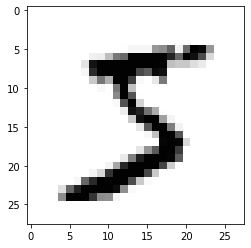

In [ ]:
import numpy
import sys
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)

# train set, test set dividng
# X : image
# Y : label
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

# show image in grey scale
plt.imshow(X_train[0], cmap='Greys')
plt.show()





컴퓨터는 기본적으로 이미지를 한픽셀에 색깔의 수치를 담습니다. 예를 들어 RGB의 경우 빨간색을 나타낸다고 하면 (255, 0, 0)과 같이 담는 거죠.

물론 벡터 이미지는 이와 같이 표현하지 않고 선의 모양이나 길이 등으로 표현합니다만... 여기선 다루지 않습니다.

Gray Scale의 경우 색상이 검정 단 하나이므로 검정은 255, 회색은 125 정도로, 255 이하의 숫자로 표현 가능합니다.

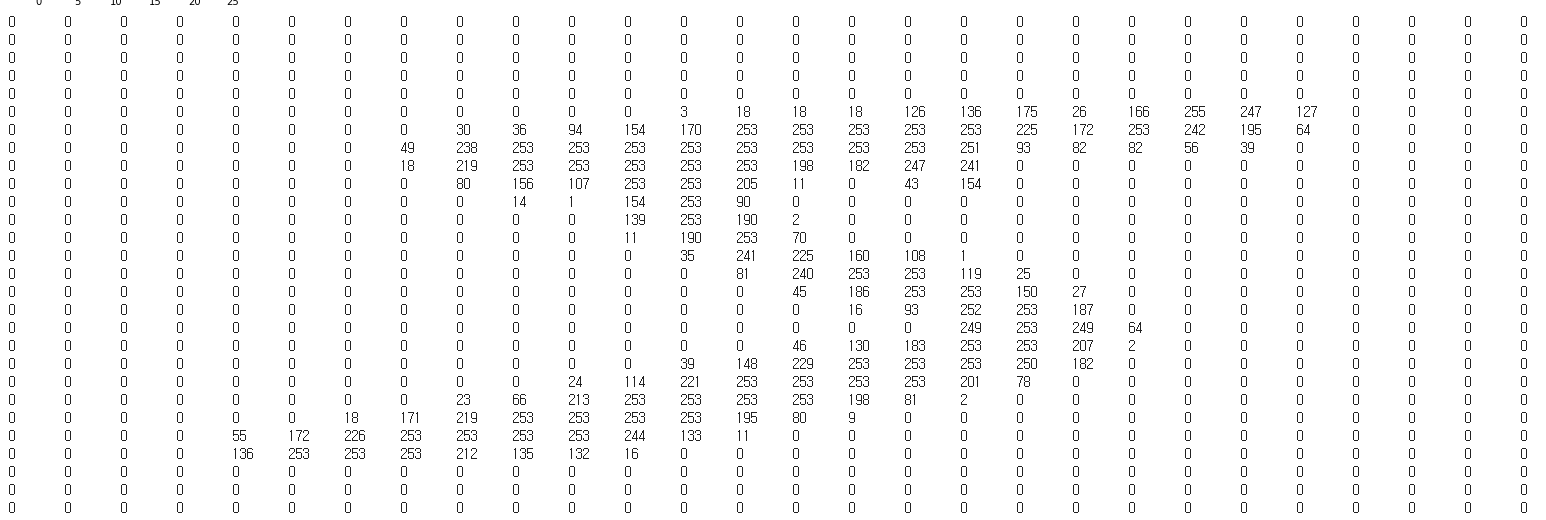

이렇게 표현하면 이미지는 속성이 28 * 28 개인 하나의 샘플이 됩니다.

In [ ]:
# show grey scale as numbers
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


reshape()함수는 2차원 행렬을 1차원 벡터로 바꿔주는 함수입니다.

reshape(샘플 개수, 속성 개수)

to_categorical()함수는 클래스를 원핫인코딩을 통해 표현할 때 사용합니다.
to_categorical(클래스, 클래스의 종류 개수)

In [ ]:
# 차원 변환
# X_train은 이미지의 집합이므로 .shape를 하면 이미지의 개수가 나온다.
# 이렇게 0에서 1 사이의 숫자로 나타내줘야 활성화 함수에 입력될 때 정확한 출력값이 나올 것이다. 활성화 함수 그래프를 보자.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

# 이렇게 한 번에 할 수도 있다.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))

# 원-핫 인코딩 : 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
